In [1]:
#レシピ 20.1
# ライブラリをロード
from sklearn import preprocessing
import numpy as np

# 特徴量を作成
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

# 標準化器を作成
scaler = preprocessing.StandardScaler()

# 特徴量を変換
features_standardized = scaler.fit_transform(features)

# 特徴量を表示
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [3]:
#平均値と標準偏差の表示
print("Mean:", round(features_standardized[:,0].mean()))
print("Standard deviation:", features_standardized[:,0].std())

Mean: 0
Standard deviation: 0.9999999999999999


In [4]:
#レシピ 20.2

# -*- coding: utf-8 -*-

# ライブラリをロード
from keras import models
from keras import layers

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

In [5]:
#レシピ 20.5

#順伝搬ニューラルネットワークを作成

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 乱数シードを設定
np.random.seed(0)

# 特徴量行列とターゲットベクトルを作成
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# 訓練セットとデータセットに分割
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=32,
                         activation="relu",
                         input_shape=(features_train.shape[1],)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=32, activation="relu"))

# 活性化関数を用いない全結合層を追加
network.add(layers.Dense(units=1))

# ニューラルネットワークをコンパイル
network.compile(loss="mse", # 平均2乗誤差を最小化
                optimizer="RMSprop", # 最適化手法を指定
                metrics=["mse"]) # 性能指標は平均2乗誤差

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=10, # エポック数
                      verbose=0, # 出力しない
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

In [6]:
#レシピ 20.6

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 10000

# IMDB映画データから、データとターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# ワンホットエンコードを行って特徴量ベクトルに変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=3, # エポック数
                      verbose=0, # 出力しない
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# テストセットのクラスを予測
predicted_target = network.predict(features_test)

##########

# 最初の観測値がクラス1である確率を表示
predicted_target[0]

782/782 [==============================] - 3s 3ms/step


array([0.11720782], dtype=float32)

In [7]:
predicted_target[0]

array([0.11720782], dtype=float32)

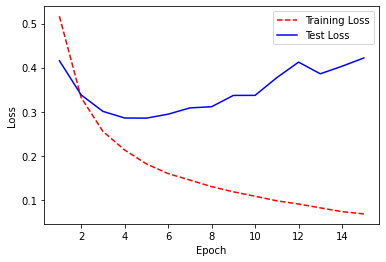

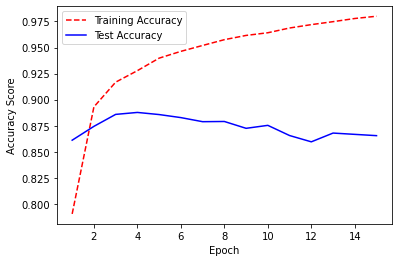

In [8]:
#レシピ 20.7

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 10000

# データをロード and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 映画批評のデータをワンホットエンコードして特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲット
                      epochs=15, # エポック数
                      verbose=0, # 出力しない
                      batch_size=1000, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# 訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数のリストを作成
epoch_count = range(1, len(training_loss) + 1)

# ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##########

# 訓練精度とテスト精度の経過を取得
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 精度の経過をプロット
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

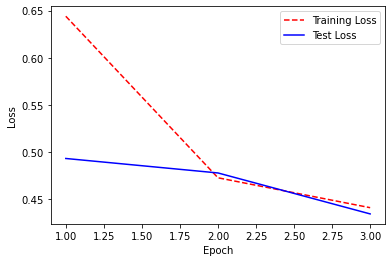

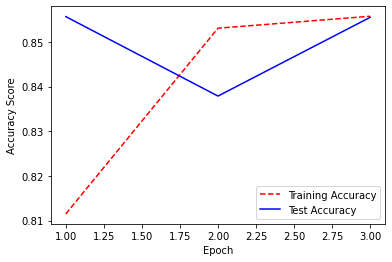

In [11]:
#レシピ 20.8

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画批評のデータとターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 映画批評データをワンホットエンコードで特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=3, # エポック数
                      verbose=0, # 出力しない
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# 訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数のリストを作成
epoch_count = range(1, len(training_loss) + 1)

# ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##########

# 訓練精度とテスト精度の経過を取得
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 精度の経過をプロット
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

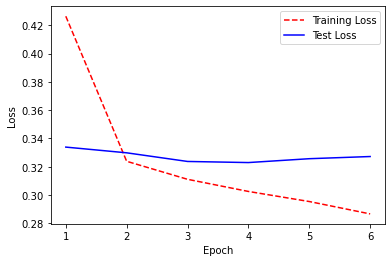

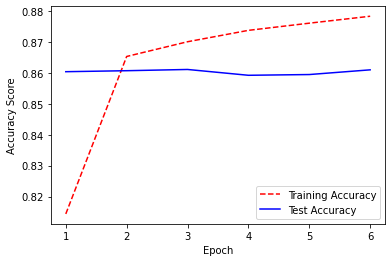

In [13]:
#レシピ 20.9

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画批評のデータとターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 映画批評データをワンホットエンコードで特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# 早期終了を行い、それまでで一番良いモデルをセーブするコールバック関数を設定
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=20, # エポック数
                      callbacks=callbacks, # 早期終了コールバック
                      verbose=0, # エポックごとに状態を表示
                      batch_size=100, # 1バッチの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# 訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数のリストを作成
epoch_count = range(1, len(training_loss) + 1)

# ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##########

# 訓練精度とテスト精度の経過を取得
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 精度の経過をプロット
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

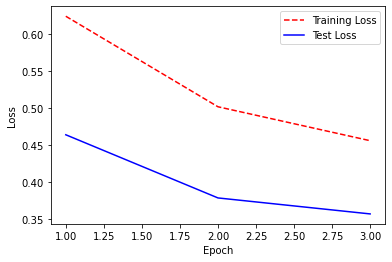

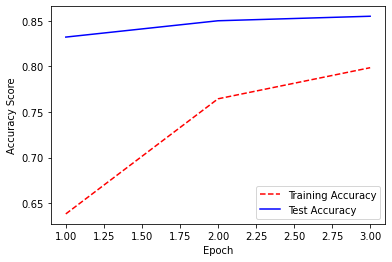

In [14]:
#レシピ 20.10

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt


# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画批評のデータとターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 映画批評データをワンホットエンコードで特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 入力層にドロップアウト層を追加
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 直前の隠れ層にドロップアウト層を追加
network.add(layers.Dropout(0.5))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 直前の隠れ層にドロップアウト層を追加
network.add(layers.Dropout(0.5))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=3, # エポック数
                      verbose=0, # 出力しない
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# 訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数のリストを作成
epoch_count = range(1, len(training_loss) + 1)

# ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##########

# 訓練精度とテスト精度の経過を取得
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 精度の経過をプロット
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

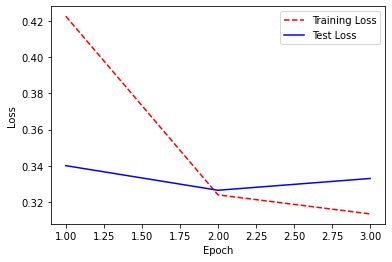

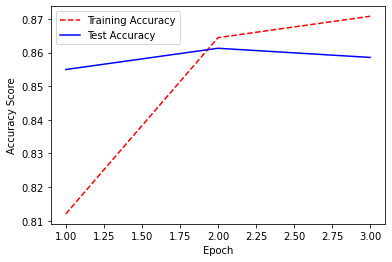

In [15]:
#レシピ 20.11

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画批評のデータとターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 映画批評データをワンホットエンコードで特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# チェックポイントをとるようにコールバックを設定
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=3, # エポック数
                      callbacks=checkpoint, # チェックポイントをとる
                      verbose=0, # 出力しない
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# 訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数のリストを作成
epoch_count = range(1, len(training_loss) + 1)

# ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##########

# 訓練精度とテスト精度の経過を取得
training_accuracy = history.history["accuracy"]# M2 米田君からの修正情報
test_accuracy = history.history["val_accuracy"]# M2 米田君からの修正情報
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 精度の経過をプロット
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [17]:
#レシピ 21.1

# -*- coding: utf-8 -*-

# ライブラリをロード
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import joblib # M2 米田君からの修正情報

# データをロード
iris = datasets.load_iris()
features = iris.data
target = iris.target

# ランダムフォレストクラス分類器を作成
classifer = RandomForestClassifier()

# ランダムフォレストクラス分類器を訓練
model = classifer.fit(features, target)

# 訓練したモデルをピクルファイルとしてセーブ
joblib.dump(model, "model.pkl")

##########

# モデルをファイルからロード
classifer = joblib.load("model.pkl")

##########

# 新たな観測値を作成
new_observation = [[ 5.2,  3.2,  1.1,  0.1]]

# 観測値のクラスを予測
classifer.predict(new_observation)

##########

# ライブラリをロード
import sklearn

# scikit-learnのバージョンを取得
scikit_version = joblib.__version__

# 訓練したモデルをピクルファイルとしてセーブ
joblib.dump(model, "model_{version}.pkl".format(version=scikit_version))

['model_1.1.0.pkl']

In [18]:
#レシピ 21.2

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import load_model

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画批評データのデータとターゲットベクトルをロードする
(train_data, train_target), (test_data, test_target) = imdb.load_data(
    num_words=number_of_features)

# 映画批評データをワンホットエンコードして特徴量行列に変換
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode="binary")
test_features = tokenizer.sequences_to_matrix(test_data, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# ニューラルネットワークを訓練
history = network.fit(train_features, # 特徴量
                      train_target, # ターゲットベクトル
                      epochs=3, # エポック数
                      verbose=0, # No output
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(test_features, test_target)) # テストデータ

# ニューラルネットワークをセーブ
network.save("model.h5")

###########

# ニューラルネットワークをロード
network = load_model("model.h5")